In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'market1501:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2875539%2F4958499%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240813%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240813T160822Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5d56ec695f1225a65a28e37da4028c60f1364ea4d4968a9d0a31b11338a2178d5046239b310adc427b55a8efc3bc14481111e4e96ed846fc78ab32f6b771030975e10873491f6783a67d4071098f107eeff4c4d28ed498de90ff20dacef58a65559295b39efa0b43b923c0d0a821d1d810767eac7cbd737257df55097511bcdd646c210f8460b9e32386a88325fa44a2d0ed6f92e6aaf858ea5d7d8e7e5e42f327f3e0b3e0c59441649409e94153987f6cff5e5c893c0f0989f6d5184642895c94e58bb469a75f20209554bbb81d2b7a156decc7d5a53bca595ab1f965b2333093c1f019cff6f0fa41c5c8ee0625858b0ae7a3c9913fa5b09e157ed0199566d6'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 153011595 bytes downloaded
Downloaded and uncompressed: market1501
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
BB_train=[];files=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if dirname=='/kaggle/input/market1501/Market-1501-v15.09.15/bounding_box_train':
            BB_train.append(os.path.join(dirname,filename));files.append(filename)
#             print(len(BB_train),len(files))
#         print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git
!pip install clip
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 4.1 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-_7zns6td
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-_7zns6td
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cur

# **Libraries**

In [ ]:
import clip
from torch.optim import Adam
from torchvision import transforms as transforms
from matplotlib import pyplot as plt,image as mpimg
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader,random_split
from PIL import Image

In [ ]:
device=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [ ]:
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [ ]:
model, transform = clip.load("ViT-B/16", device=device)

100%|████████████████████████████████████████| 335M/335M [00:02<00:00, 127MiB/s]


In [ ]:
for name, param in model.named_parameters():
    if name in ['token_embedding.weight','ln_final.weight','ln_final.bias']:
        print(name,param.shape)

token_embedding.weight torch.Size([49408, 512])
ln_final.weight torch.Size([512])
ln_final.bias torch.Size([512])


In [ ]:
for param in model.parameters():
    param.requires_grad = False

# **Data Peparation**

In [ ]:
X=[];y=[]
for i in range(len(BB_train)):
    if files[i][0:4]!='Thum':
        X.append(BB_train[i]);y.append(int(files[i][0:4]))

In [ ]:
min(y),max(y)

(2, 1500)

In [ ]:
label_mapping={lab:i for i,lab in enumerate(set(y))}  # just to assign proper number as label
y=[label_mapping[i] for i in y]

In [ ]:
def display_image(image_path):
    img = mpimg.imread(image_path)
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

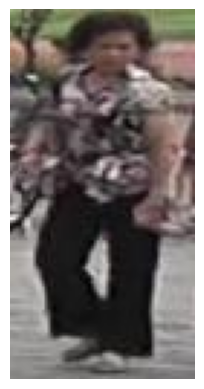

In [ ]:
display_image(X[1577])

In [ ]:
image_mapping={i:[] for i in set(y)}
for i in range(len(y)): image_mapping[y[i]].append(i)    # {img_label:[indices of imgs of same label]}

# if y==1 -> pair is of same class imgs
# if y==0 -> pair is of diff. class imgs

def Prepare_data(x,y):
    X_train=[];y_train=[]
    for i,img in enumerate(x):
        label=y[i]
        if len(image_mapping[label])<15:
            not_same = 30 - len(image_mapping[label])
            for img in image_mapping[label]:
              X_train.append([x[i],x[img]])
              y_train.append(1)
            not_same_data = set()
            while len(not_same_data)<not_same:
              diff_label=random.choice(list(image_mapping.keys()))
              while diff_label==label:
                diff_label=random.choice(list(image_mapping.keys()))
              ind2=random.choice(image_mapping[diff_label])

              not_same_data.add(x[ind2])

            for img in not_same_data:
              X_train.append([x[i],img])
              y_train.append(0)

        else:
          idx_list = random.sample(image_mapping[label], 15)
          for idx in idx_list:
            X_train.append([x[i],x[idx]])
            y_train.append(1)

          not_same_data = set()
          while len(not_same_data)<15:
              diff_label=random.choice(list(image_mapping.keys()))
              while diff_label==label:
                diff_label=random.choice(list(image_mapping.keys()))
              ind2=random.choice(image_mapping[diff_label])

              not_same_data.add(x[ind2])

          for img in not_same_data:
              X_train.append([x[i],img])
              y_train.append(0)

    return X_train,y_train



# def Prepare_data(x,y):
#     X_train=[];y_train=[]
#     for i,img in enumerate(x):
#         label=y[i]
#         ind1=random.choice(image_mapping[label])
#         while i==ind1:
#             ind1=random.choice(image_mapping[label])
#         X_train.append([x[i],x[ind1]])
#         y_train.append(1)

#         diff_label=random.choice(list(image_mapping.keys()))
#         while diff_label==label:
#             diff_label=random.choice(list(image_mapping.keys()))
#         ind2=random.choice(image_mapping[diff_label])

#         X_train.append([x[i],x[ind2]])
#         y_train.append(0)
#     return X_train,y_train




# image_mapping
X_train,y_train=Prepare_data(X,y)
len(X_train),len(y_train),X_train[0],y_train[0]

(388080,
 388080,
 ['/kaggle/input/market1501/Market-1501-v15.09.15/bounding_box_train/0339_c2s1_078121_02.jpg',
  '/kaggle/input/market1501/Market-1501-v15.09.15/bounding_box_train/0339_c2s1_078121_02.jpg'],
 1)

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Defining arhitecture**

In [ ]:
from PIL import Image
path=['/kaggle/input/market1501/Market-1501-v15.09.15/bounding_box_train/0002_c1s1_000451_03.jpg',
      '/kaggle/input/market1501/Market-1501-v15.09.15/bounding_box_train/0002_c1s1_000551_01.jpg'
      ]

images=[transform(Image.open(i).convert("RGB")) for i in path]
image_input = torch.tensor(np.stack(images)).cuda()

# image_input=transform(Image.open(path)).unsqueeze(0).cuda()
# image_input=transform(torch.tensor(images)).cuda()
model.encode_image(image_input).shape

torch.Size([2, 512])

In [17]:
class Person_Dataset(Dataset):
    def __init__(self,X,y):
        self.X=X
        self.y=y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        img1_path, img2_path = self.X[idx]
        img1 = Image.open(img1_path).convert("RGB")
        img2 = Image.open(img2_path).convert("RGB")

        img1 = transform(img1)
        img2 = transform(img2)

        return (img1, img2), self.y[idx]

dataset = Person_Dataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4)

In [14]:
class Contrastive_loss_fn(nn.Module):
    def __init__(self,margin):
        super(Contrastive_loss_fn,self).__init__()
        self.margin=margin
    def forward(self,output1,output2,label):
        euclidean_distance=F.pairwise_distance(output1,output2,keepdim=True)
        # Clamp the euclidean distance instead of the margin
        loss_contrastive = torch.mean((label)*torch.pow(euclidean_distance, 2) +
                                      (1-label)*torch.pow(torch.clamp(euclidean_distance, min=self.margin), 2))
        return loss_contrastive
    # def forward(self,output1,output2,label):
    #     euclidean_distance=F.pairwise_distance(output1,output2,keepdim=True)
    #     loss_contrastive = torch.mean((label)*torch.pow(euclidean_distance, 2) +(1-label)*torch.pow(torch.clamp(self.margin ,euclidean_distance, min=0.0), 2))
    #     return loss_contrastive



class SiameseNetwork(nn.Module):
    def __init__(self,emb_dim,model):
        super(SiameseNetwork,self).__init__()
        self.encoder_model=model
        self.emb_dim=emb_dim
        self.classifier=nn.Linear(in_features=512,out_features=emb_dim)
        self.relu=nn.ReLU()
    def encode_one_image(self,x):
      x=self.encoder_model.encode_image(x)
      x=self.classifier(x.float())
      x=self.relu(x)
      return x
    def forward(self,input1,input2):
        output1=self.encode_one_image(input1)
        output2=self.encode_one_image(input2)
        return output1,output2

Siamese_model=SiameseNetwork(1024,model).to(device)
Siamese_model=Siamese_model.to(device)

loss_fn=Contrastive_loss_fn(margin=2.0)
optimizer=Adam(Siamese_model.parameters(),lr=0.0001)
epochs=2


loss_per_batch=[]
for _ in range(epochs):
  loss_tracking=0
  for cnt,(i,j) in enumerate(dataloader):
      optimizer.zero_grad()
      imgs1=torch.tensor(i[0]).to(device)
      imgs2=torch.tensor(i[1]).to(device)
      labels=j.to(device)
      output1,output2=Siamese_model(imgs1,imgs2)
      loss=loss_fn(output1,output2,labels)
      loss_tracking+=loss.item()
      loss_per_batch.append(loss.item())
      loss.backward()
      optimizer.step()
      if cnt%50==0:
        print(f'batch: {cnt} avg-loss: {loss_tracking/((cnt+1))}')
        loss_tracking=0
  print(f'epoch: {_+1} avg-loss: {np.mean(loss_per_batch)}')


<ipython-input-14-3b1179a6748b>:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imgs1=torch.tensor(i[0]).to(device)
<ipython-input-14-3b1179a6748b>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imgs2=torch.tensor(i[1]).to(device)


batch: 0 avg-loss: 10.953030586242676
batch: 50 avg-loss: 5.5169825507145305
batch: 100 avg-loss: 1.585380993267097
batch: 150 avg-loss: 0.9608009208906565
batch: 200 avg-loss: 0.6747240960894533
batch: 250 avg-loss: 0.5156841225833056
batch: 300 avg-loss: 0.42099993252675005
batch: 350 avg-loss: 0.35849965467751876
batch: 400 avg-loss: 0.2929372326691549
batch: 450 avg-loss: 0.2649775817494699
batch: 500 avg-loss: 0.23711376704141765
batch: 550 avg-loss: 0.20895151196287678
batch: 600 avg-loss: 0.19123238335036596
batch: 650 avg-loss: 0.17397493297969507
batch: 700 avg-loss: 0.16003717097338188
batch: 750 avg-loss: 0.15011833717280157
batch: 800 avg-loss: 0.14395841572912743
batch: 850 avg-loss: 0.13495700353741225
batch: 900 avg-loss: 0.12479756079556278
batch: 950 avg-loss: 0.11582774469152986
batch: 1000 avg-loss: 0.11173264987461574
batch: 1050 avg-loss: 0.10491713481670782
batch: 1100 avg-loss: 0.1022847901681247
batch: 1150 avg-loss: 0.09785364898363473
batch: 1200 avg-loss: 0.0

KeyboardInterrupt: 

#Additional training

In [18]:
for name, param in model.named_parameters():
    if name == 'visual.proj':
        param.requires_grad = True


'''
I would recommend starting with the final layer of the CLIP model, which is responsible for combining the image and text embeddings.
This allows you to fine-tune how the model maps the image embeddings to a space that's relevant to your specific task, while keeping the majority of the pre-trained weights frozen.

If you find that you need more flexibility, you can gradually unfreeze earlier layers in the visual encoder.
'''

"\nI would recommend starting with the final layer of the CLIP model, which is responsible for combining the image and text embeddings.\nThis allows you to fine-tune how the model maps the image embeddings to a space that's relevant to your specific task, while keeping the majority of the pre-trained weights frozen.\n\nIf you find that you need more flexibility, you can gradually unfreeze earlier layers in the visual encoder.\n"

In [19]:
for _ in range(1):
  loss_tracking=0
  for cnt,(i,j) in enumerate(dataloader):
      optimizer.zero_grad()
      imgs1=torch.tensor(i[0]).to(device)
      imgs2=torch.tensor(i[1]).to(device)
      labels=j.to(device)
      output1,output2=Siamese_model(imgs1,imgs2)
      loss=loss_fn(output1,output2,labels)
      loss_tracking+=loss.item()
      loss_per_batch.append(loss.item())
      loss.backward()
      optimizer.step()
      if cnt%50==0:
        print(f'batch: {cnt} avg-loss: {loss_tracking/((cnt+1))}')
        loss_tracking=0
  print(f'epoch: {_+1} avg-loss: {np.mean(loss_per_batch)}')

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-19-c9e2748eaf0d>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imgs1=torch.tensor(i[0]).to(device)
<ipython-input-19-c9e2748eaf0d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imgs2=torch.tensor(i[1]

batch: 0 avg-loss: 2.062521457672119
batch: 50 avg-loss: nan


KeyboardInterrupt: 

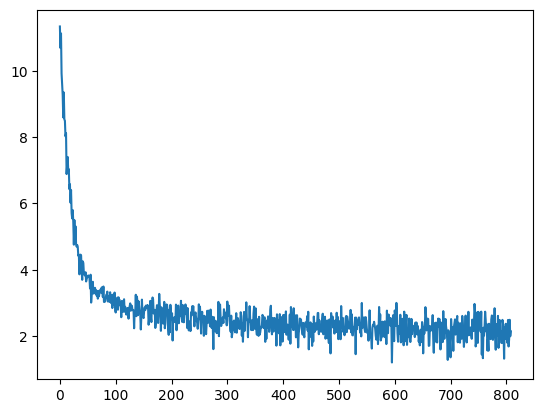

In [ ]:
plt.plot(loss_per_batch)

In [ ]:
for i,j in dataloader:
    print(type(i),type(j))
    print(len(i),len(i[0]),len(i[1]))
    print(len(j))
    print(type(i[0][0]),i[0][0].shape)
    break

# [[32 imgs],[32 imgs]]


<class 'list'> <class 'torch.Tensor'>
2 32 32
32
<class 'torch.Tensor'> torch.Size([3, 224, 224])


In [16]:
# Saving the model's trained weights
def save_model_weights(model, path):
    """
    Saves the trained weights of a PyTorch model.

    Args:
        model: The PyTorch model whose weights need to be saved.
        path: The file path where the weights will be stored.
    """
    torch.save(model.state_dict(), path)
    print(f"Model weights saved to {path}")

# Loading the model's trained weights
def load_model_weights(model, path):
    """
    Loads trained weights into a PyTorch model.

    Args:
        model: The PyTorch model to load weights into.
        path: The file path where the weights are stored.
    """
    model.load_state_dict(torch.load(path))
    print(f"Model weights loaded from {path}")

# Example usage:

# Assuming 'Siamese_model' is your trained model
save_model_weights(Siamese_model, "/content/drive/MyDrive/Person ReIdentification/siamese_model_weights.pth")



Model weights saved to /content/drive/MyDrive/Person ReIdentification/siamese_model_weights.pth


In [20]:
# Later, to load the weights into a new instance of the same model architecture
new_model = SiameseNetwork(1024, model).to(device)  # Assuming 'model' is available
load_model_weights(new_model, "/content/drive/MyDrive/Person ReIdentification/siamese_model_weights.pth")

Model weights loaded from /content/drive/MyDrive/Person ReIdentification/siamese_model_weights.pth


#**Testing**

In [ ]:
ind=2
X_train[ind],y_train[ind]

(['/kaggle/input/market1501/Market-1501-v15.09.15/bounding_box_train/1002_c6s3_093817_01.jpg',
  '/kaggle/input/market1501/Market-1501-v15.09.15/bounding_box_train/1002_c3s3_069994_03.jpg'],
 1)

In [21]:
new_model.eval()
imgs=['/kaggle/input/market1501/Market-1501-v15.09.15/bounding_box_train/0002_c1s1_000451_03.jpg',
'/kaggle/input/market1501/Market-1501-v15.09.15/bounding_box_train/0002_c1s1_000551_01.jpg',
 '/kaggle/input/market1501/Market-1501-v15.09.15/bounding_box_train/0010_c3s3_076019_01.jpg',
 '/kaggle/input/market1501/Market-1501-v15.09.15/bounding_box_train/0010_c6s4_002452_02.jpg',
  '/kaggle/input/market1501/Market-1501-v15.09.15/bounding_box_train/0022_c3s1_044676_01.jpg',
      '/kaggle/input/market1501/Market-1501-v15.09.15/bounding_box_train/0022_c4s1_045251_01.jpg'
]

images=[transform(Image.open(i).convert("RGB")) for i in imgs]
image_input = torch.tensor(np.stack(images)).cuda()

outputs=[]
with torch.no_grad():
  for i in range(len(image_input)):
    outputs.append(new_model.encode_one_image(image_input[i].unsqueeze(0)))

  # o1,o2=Siamese_model(image_input[0].unsqueeze(0),image_input[1].unsqueeze(0))
similar_images=[]
for i in range(len(imgs)):
  temp=[]
  for j in range(len(imgs)):
    temp.append(F.pairwise_distance(outputs[i],outputs[j]).item())
  similar_images.append(temp)
similar_images
# distance=F.pairwise_distance(o1,o2)

[[3.199999991920777e-05,
  0.005264763254672289,
  0.006094380747526884,
  0.009876084513962269,
  0.00710397819057107,
  0.006107846274971962],
 [0.0052687544375658035,
  3.199999991920777e-05,
  0.00720958411693573,
  0.00811564177274704,
  0.006019894033670425,
  0.006591521669179201],
 [0.00609169015660882,
  0.007204392459243536,
  3.199999991920777e-05,
  0.007921194657683372,
  0.005612598732113838,
  0.003961529117077589],
 [0.009875625371932983,
  0.008112492971122265,
  0.007922693155705929,
  3.199999991920777e-05,
  0.00656796433031559,
  0.007392498664557934],
 [0.007104278076440096,
  0.006016754545271397,
  0.005615898873656988,
  0.006568978074938059,
  3.199999991920777e-05,
  0.005992545280605555],
 [0.006106851156800985,
  0.006587408948689699,
  0.003964133094996214,
  0.007392288651317358,
  0.0059911757707595825,
  3.199999991920777e-05]]

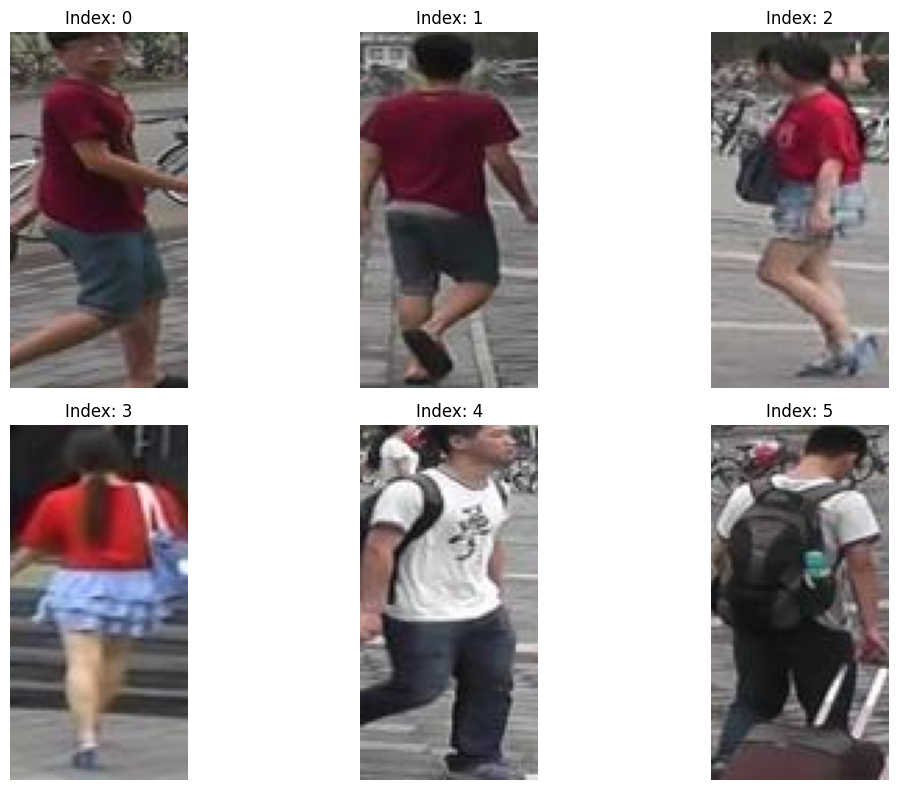

In [22]:
num_cols = 3  # Number of columns
num_rows = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))  # Adjust figsize as needed

# Iterate through images and display them
for i, img_path in enumerate(imgs):
    row = i // num_cols
    col = i % num_cols
    img = Image.open(img_path)
    axes[row, col].imshow(img)
    axes[row, col].set_title(f"Index: {i}")
    axes[row, col].axis('off')  # Hide axes

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

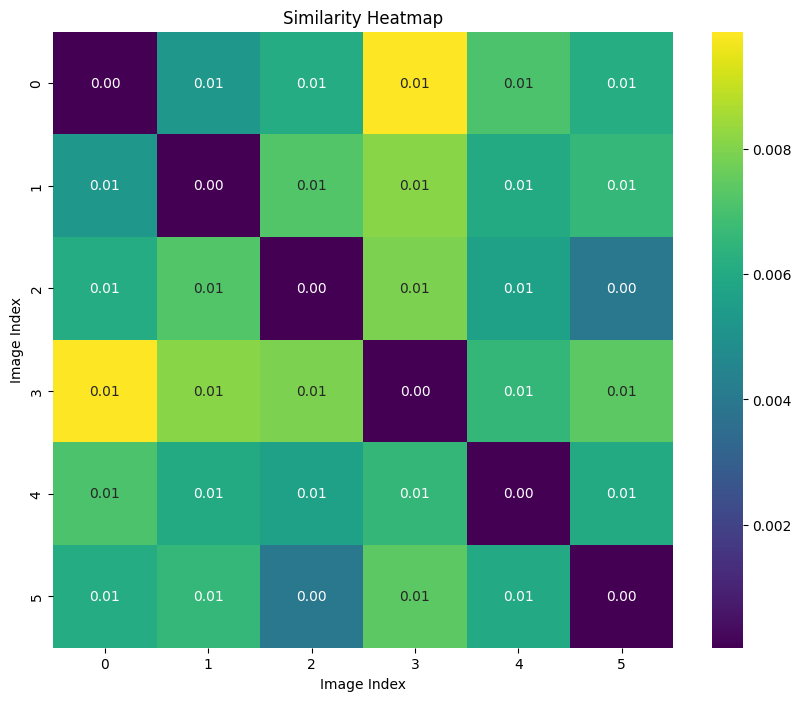

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'similar_images' is your list of lists
plt.figure(figsize=(10, 8))
sns.heatmap(similar_images, annot=True, cmap='viridis', fmt=".2f")
plt.title("Similarity Heatmap")
plt.xlabel("Image Index")
plt.ylabel("Image Index")
plt.show()